In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column

bmi_list = df['weight'] / (df['height'] / 100) ** 2

def is_overweight(bmi):
    if bmi > 25:
        return 1
    else:
        return 0

overweight_list = [is_overweight(x) for x in bmi_list]

df['overweight'] =  overweight_list

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
def is_cho_bad(cholesterol):
    if cholesterol > 1: 
        return 1
    else: 
        return 0
def is_gluc_bad(gluc):
    if gluc > 1: 
        return 1 
    else: 
        return 0

df['cholesterol'] = df['cholesterol'].apply(is_cho_bad)
df['gluc'] = df['gluc'].apply(is_gluc_bad)


# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
    df_cat = df_cat.rename(columns={0: 'total'})

    # Draw the catplot with 'sns.catplot()'
    catplot = sns.catplot(data=df_cat, kind="bar", x="variable", y="total", hue="value", col="cardio")
    fig = catplot.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 11))
    
    # Draw the heatmap with 'sns.heatmap()'
    heatmap = sns.heatmap(corr, annot=True, fmt='.1f', linewidths=1, mask=mask, square=True, cbar_kws={"shrink":.5})


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            1     0   
2          2  18857    1     165    64.0    130     70            1     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            0     0   
69996  99995  22601    1     158   126.0    140     90            1     1   
69997  99996  19066    2     183   105.0    180     90            1     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  overweight  
0          0     0       1

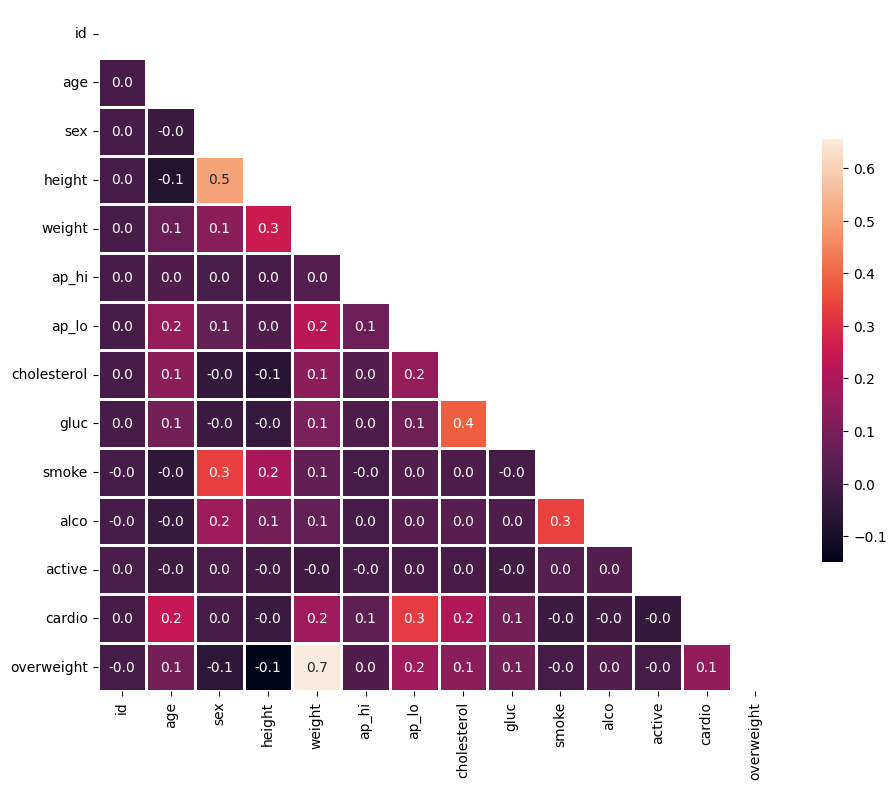

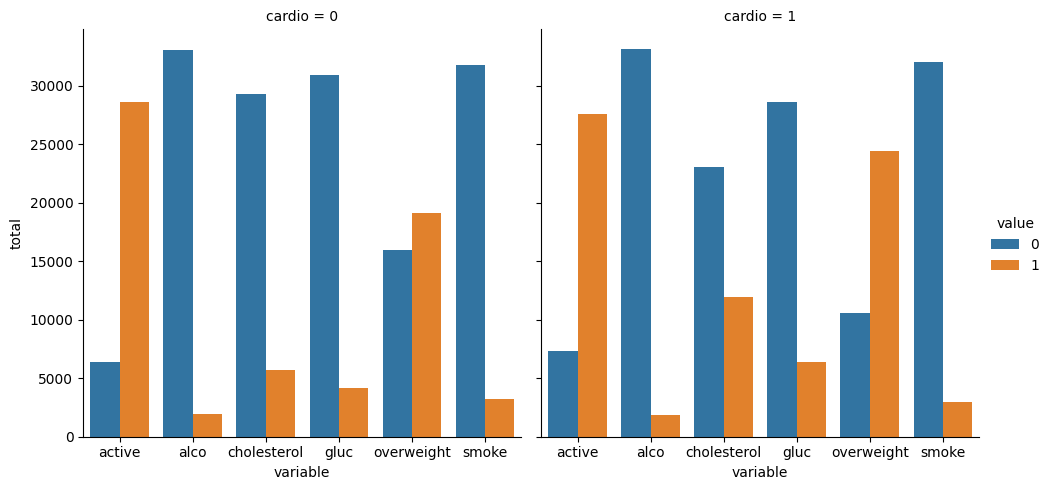

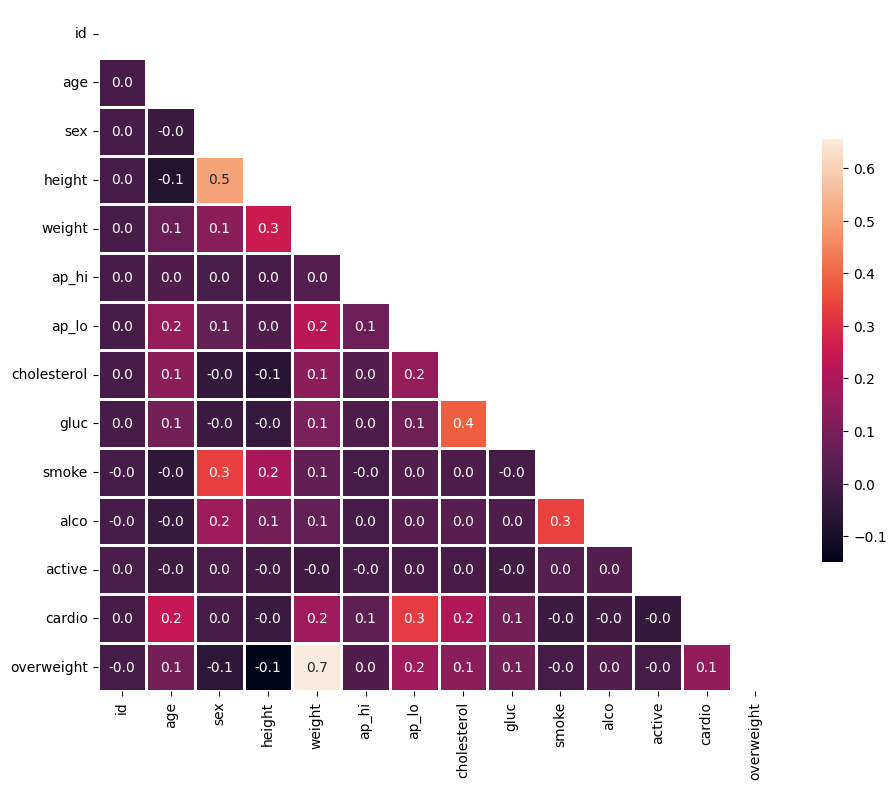

In [72]:
print(df)
draw_cat_plot()
draw_heat_map()

In [162]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
print(df_cat)
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()#toma el total de cada combinación porque usamos size().
#Esto generará un nuevo dataframe donde cada fila representará una combinación única de 'cardio'(siendo el valor en la columna de la determinada persona tambien "0" o "1")
# , 'variable'(siendo variable, alguna de la lista de value_vars) 
# y 'value'(siendo "0" o "1", porque esta normalizado). 
# mostrará la cantidad de ocurrencias para esa combinación.
df_cat = df_cat.rename(columns={0: 'total'})
#Renombramos la ultima fila llamada 0 en este caso por 'total' para ver el total de cada combinación.
print(df_cat)
#Para cada elemento en las columnas de value_vars, en este caso en especifico contabilizamos teniendo en cuenta que cada columna esta normalizada, es decir solo tiene valores de 0 y 1.
#Contabilizamos la cantidad de apariciones con respecto a la columna 'cardio' 
#Esto sería de la forma, Si hay diez personas en la columna 'alco' y siete tienen "1" y tres tienen "0" pero de esas diez personas a su vez cinco tienen cardio "1" y cinco tienen cardo "0".
#Entonces la función lo que hace es ver que persona tiene "0" en cardio y "0" en alco y todas las combinaciones posibles, "0" cardio "1" alco, "1" cardio "0" alco y "1" cardio "1" alco.

        cardio     variable  value
0            0  cholesterol      0
1            1  cholesterol      1
2            1  cholesterol      1
3            1  cholesterol      0
4            0  cholesterol      0
...        ...          ...    ...
419995       0   overweight      1
419996       1   overweight      1
419997       1   overweight      1
419998       1   overweight      1
419999       0   overweight      0

[420000 rows x 3 columns]
    cardio     variable  valor  total
0        0       active      0   6378
1        0       active      1  28643
2        0         alco      0  33080
3        0         alco      1   1941
4        0  cholesterol      0  29330
5        0  cholesterol      1   5691
6        0         gluc      0  30894
7        0         gluc      1   4127
8        0   overweight      0  15915
9        0   overweight      1  19106
10       0        smoke      0  31781
11       0        smoke      1   3240
12       1       active      0   7361
13       1       acti